## A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [3]:
import pandas as pd

In [4]:
#Read 
file = 'ada_vs_abs/data_NRG_ada_30s.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(1035, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.988186,20.478498,4.089674,0.379634,0.117483,160.641403,198.192886,8.975998,5.951560,12.921071,...,2.388727,0.630828,0.597704,0.590780,0.576712,0.519700,0.264084,434.193115,0.914482,suaraarchive
1,0.968379,15.320263,6.943198,0.171818,0.090113,26.312613,69.235451,3.349055,3.365176,29.381922,...,2.579776,0.895548,0.437140,0.432375,0.453034,0.617205,0.201986,434.193115,0.857048,suaraarchive
2,0.961911,14.853801,6.487042,0.309190,0.134920,36.727467,61.274410,3.712230,2.883528,12.519576,...,2.466795,0.769552,0.639024,0.656498,0.667925,0.449289,0.139628,434.193115,0.786461,suaraarchive
3,0.984195,19.392551,4.652277,0.236884,0.071677,70.987419,86.121933,6.727059,3.746682,11.425290,...,2.289503,0.803594,0.702167,0.709757,0.708595,0.596609,0.109998,440.254242,0.737786,suaraarchive
4,0.989017,15.688944,7.368422,0.212260,0.122203,40.260254,53.379383,4.249978,2.831521,17.101896,...,2.521369,0.769857,0.608317,0.604574,0.602309,0.455554,0.209978,434.193115,0.915794,suaraarchive


In [5]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

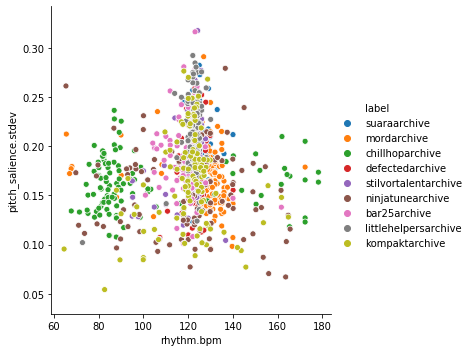

In [6]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

In [7]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.952248,15.873745,5.672438,0.264289,0.107595,72.068507,144.493509,4.462619,4.029200,14.609930,...,5.616286,2.159383,0.720389,0.588068,0.589004,0.587099,0.525658,0.210091,436.736802,0.874860
std,0.075543,2.717432,1.054826,0.081654,0.037502,76.931084,179.202921,2.053157,2.177337,8.058646,...,1.131823,0.359946,0.093981,0.125688,0.126367,0.125067,0.097683,0.074196,4.959479,0.090125
min,0.094679,8.371400,1.532150,0.079238,0.018111,0.257622,1.411797,0.308921,0.396244,0.456950,...,3.149999,1.150857,0.377700,0.219322,0.222864,0.228071,0.194460,0.002877,431.443085,0.569442
25%,0.952494,13.993185,4.944035,0.206684,0.082220,22.019686,39.529701,2.990434,2.420218,8.550832,...,4.782813,1.896354,0.655909,0.504541,0.501116,0.501357,0.462929,0.172651,434.193115,0.845392
50%,0.975928,15.772546,5.666733,0.255874,0.104174,48.996506,91.750435,4.229000,3.671598,13.377729,...,5.411049,2.127462,0.723492,0.605286,0.605114,0.600800,0.529626,0.217818,434.193115,0.897670
75%,0.984717,17.885271,6.400847,0.312379,0.129777,93.932812,192.648407,5.688199,5.258108,19.132484,...,6.267091,2.425113,0.778683,0.679911,0.682141,0.679774,0.591802,0.257583,437.718536,0.936963
max,0.990216,24.052708,8.728979,0.585487,0.294311,661.860596,2247.064209,15.467979,18.644485,70.538437,...,9.885797,3.345558,1.103085,0.898272,0.910610,0.918201,0.831871,0.472213,456.570251,0.996004




### Preprocessing of the features

**Normalisation of the features**

In [8]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [9]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.957603,0.478426,0.575293,0.365535,0.323985,0.108541,0.063715,0.274008,0.199085,0.201950,...,0.366146,0.459528,0.472424,0.543112,0.532377,0.520232,0.519599,0.441504,0.210677,0.715999
std,0.084355,0.173291,0.146568,0.161292,0.135778,0.116280,0.079800,0.135441,0.119318,0.114990,...,0.168031,0.164007,0.129560,0.185121,0.183741,0.181222,0.153250,0.158087,0.197375,0.211281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.957878,0.358502,0.474082,0.251747,0.232113,0.032893,0.016974,0.176892,0.110913,0.115492,...,0.242408,0.339680,0.383533,0.420089,0.404585,0.395992,0.421187,0.361732,0.109445,0.646916
50%,0.984045,0.471972,0.574501,0.348912,0.311597,0.073668,0.040228,0.258596,0.179489,0.184368,...,0.335677,0.444983,0.476701,0.568473,0.555801,0.540085,0.525823,0.457968,0.109445,0.769473
75%,0.993859,0.606701,0.676506,0.460526,0.404294,0.141588,0.085159,0.354856,0.266429,0.266483,...,0.462765,0.580606,0.552788,0.678384,0.667800,0.654519,0.623369,0.542695,0.249748,0.861588
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_modif.label.value_counts()

mordarchive             115
ninjatunearchive        115
defectedarchive         115
kompaktarchive          115
chillhoparchive         115
stilvortalentarchive    115
bar25archive            115
littlehelpersarchive    115
suaraarchive            115
Name: label, dtype: int64

In [11]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.99773399 0.77207199 0.35536821 ... 0.55654481 0.10944451 0.80888542]
 [0.97561621 0.44313033 0.75186559 ... 0.42423515 0.10944451 0.67424264]
 [0.96839373 0.41338395 0.68848263 ... 0.29136994 0.10944451 0.5087634 ]
 ...
 [0.99033825 0.36826535 0.52951107 ... 0.541463   0.47253048 0.65025419]
 [0.98359412 0.39226997 0.46287843 ... 0.54155126 0.10944451 0.89767763]
 [0.94188896 0.14677192 0.27906662 ... 0.15330398 0.56448825 0.39220494]]
Class of the first sample:  8


In [12]:
print(y)
print(y.shape)


[8 8 8 ... 3 3 3]
(1035,)


In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=110)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(110,'Score'))  #print k best features

                                    Specs      Score
49                silence_rate_60dB.stdev  46.743046
19                erbbands_kurtosis.stdev  39.537191
45                silence_rate_20dB.stdev  36.947222
18                 erbbands_kurtosis.mean  31.659999
21                erbbands_skewness.stdev  30.187001
..                                    ...        ...
102              tonal.hpcp_entropy.stdev   2.777937
65   spectral_energyband_middle_low.stdev   2.539868
54                 spectral_decrease.mean   1.574500
0                        average_loudness   0.426670
44                 silence_rate_20dB.mean   0.353370

[110 rows x 2 columns]


In [14]:
X_new = bestfeatures.fit_transform(x, y)

In [15]:
print ( X_new.shape)

(1035, 110)


In [16]:
from numpy import save
save('y.npy', y)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)


#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

Our neural network will have 4 neurons at the output layer each of which will output the estimated probability of the sample belonging to a class. So, let's convert our labels to **one-hot encoding** to fit to that representation.
Example: a sample belonging to the 'violin' class is represented with 3 (integer encoded) will be represented with  [0 0 0 1]. Similarly, a 'ebclar' sample represented with with 0 will be represented with [1 0 0 0]

In [19]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (828, 9)
One-hot encoded y_test shape =  (207, 9)


**Let's define our deep learning architecture**

In [20]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 55))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

Using TensorFlow backend.


You can have a look at the summary of the model

Let's pick an optimizer, compile the model and train the network

In [21]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0)

Testing the trained model

In [22]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3881306207698325
Test accuracy: 0.5169082283973694


In [23]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

946


In [24]:
y_pred = y.argmax(axis=1)

It is a good and common practice to check the learning curves

In [25]:
from sklearn.metrics import classification_report
target_names= ['bar25', 'chillhop', 'defected', 'kompakt','littlehelpers', 'mord', 'ninjatune', 'stilvortalent', 'suara']
report = classification_report(y_test,y_pred, target_names=target_names, output_dict= True)
print(classification_report(y_test,y_pred, target_names=target_names))

               precision    recall  f1-score   support

        bar25       0.41      0.45      0.43        20
     chillhop       0.78      0.81      0.79        31
     defected       0.40      0.29      0.33        21
      kompakt       0.45      0.45      0.45        20
littlehelpers       0.67      0.78      0.72        23
         mord       0.75      0.80      0.77        15
    ninjatune       0.38      0.42      0.40        26
stilvortalent       0.31      0.43      0.36        21
        suara       0.47      0.27      0.34        30

     accuracy                           0.52       207
    macro avg       0.51      0.52      0.51       207
 weighted avg       0.52      0.52      0.51       207



In [26]:
df = pd.DataFrame(report).transpose()
df = df['f1-score']
df = df.iloc[0:9]
df = pd.DataFrame(df)
df = df.rename(columns={'f1-score': '30s_ada'})
print(df)
#df1['RecordLabel'] = df1.index
#print(len(df1.columns))

print(type(df))

                30s_ada
bar25          0.428571
chillhop       0.793651
defected       0.333333
kompakt        0.450000
littlehelpers  0.720000
mord           0.774194
ninjatune      0.400000
stilvortalent  0.360000
suara          0.340426
<class 'pandas.core.frame.DataFrame'>


## FCL_ABS with Bar Chart


In [27]:
#Read 
file = 'ada_vs_abs/data_30s_abs.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(1035, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.985963,16.988277,6.152028,0.234508,0.104749,54.934834,111.080116,4.672720,4.311407,22.171335,...,1.935214,0.825875,0.671964,0.650649,0.601438,0.614866,0.230020,434.193115,0.894006,suaraarchive
1,0.981879,16.154875,7.029408,0.248749,0.129977,139.366715,373.698608,6.428804,7.328341,24.018057,...,2.261895,0.816613,0.467872,0.477233,0.485559,0.560867,0.263837,434.193115,0.917605,suaraarchive
2,0.987341,17.704046,5.994382,0.221113,0.102747,61.243366,91.167221,5.480647,4.225255,16.820066,...,2.214764,0.626813,0.407111,0.422130,0.442967,0.613699,0.240900,434.193115,0.956878,suaraarchive
3,0.988173,18.196672,5.676707,0.250346,0.116325,131.642410,197.429703,7.458259,6.250255,25.070768,...,2.151182,0.751411,0.538804,0.536238,0.531833,0.583113,0.253850,434.193115,0.934906,suaraarchive
4,0.974610,16.868780,5.965635,0.272079,0.128965,67.502502,97.909622,5.588888,4.365337,18.521112,...,2.586561,0.888847,0.626011,0.628222,0.619442,0.556919,0.238008,434.193115,0.894724,suaraarchive


In [28]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [29]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.99580082 0.62858924 0.62376039 ... 0.49492942 0.11818908 0.7531477 ]
 [0.99166978 0.57740937 0.76054089 ... 0.56782885 0.11818908 0.80897225]
 [0.99719478 0.67254514 0.599184   ... 0.518384   0.11818908 0.90187227]
 ...
 [0.98624355 0.56612256 0.5483726  ... 0.38825126 0.20736905 0.65730876]
 [0.98084167 0.59086628 0.57181089 ... 0.67647132 0.11818908 0.93065097]
 [0.99565998 0.70336201 0.73198501 ... 0.44058589 0.11818908 0.79975125]]
Class of the first sample:  8


In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=110)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(110,'Score'))  #print k best features

                                     Specs      Score
49                 silence_rate_60dB.stdev  52.904380
75                  spectral_rolloff.stdev  32.915049
41                   melbands_spread.stdev  32.887092
21                 erbbands_skewness.stdev  31.174851
10                  barkbands_spread.stdev  27.826430
..                                     ...        ...
89  rhythm.bpm_histogram_first_peak_weight   1.624347
65    spectral_energyband_middle_low.stdev   1.507741
30         loudness_ebu128.short_term.mean   1.433258
0                         average_loudness   0.856595
44                  silence_rate_20dB.mean   0.251267

[110 rows x 2 columns]


In [31]:
X_new = bestfeatures.fit_transform(x, y)

In [32]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)


#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

In [33]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (828, 9)
One-hot encoded y_test shape =  (207, 9)


In [34]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 55))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

In [35]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0)

In [36]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4073197432762183
Test accuracy: 0.5072463750839233


In [37]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

1810


In [38]:
y_pred = y.argmax(axis=1)

In [39]:
from sklearn.metrics import classification_report
target_names= ['bar25', 'chillhop', 'defected', 'kompakt','littlehelpers', 'mord', 'ninjatune', 'stilvortalent', 'suara']
report1 = classification_report(y_test,y_pred, target_names=target_names, output_dict= True)
print(classification_report(y_test,y_pred, target_names=target_names))

               precision    recall  f1-score   support

        bar25       0.55      0.52      0.54        21
     chillhop       0.72      0.91      0.81        23
     defected       0.48      0.32      0.38        31
      kompakt       0.43      0.50      0.47        20
littlehelpers       0.71      0.65      0.68        26
         mord       0.57      0.80      0.67        15
    ninjatune       0.37      0.50      0.43        20
stilvortalent       0.31      0.38      0.34        21
        suara       0.38      0.20      0.26        30

     accuracy                           0.51       207
    macro avg       0.50      0.53      0.51       207
 weighted avg       0.50      0.51      0.49       207



In [40]:
df1 = pd.DataFrame(report1).transpose()
print(type(df1))
df1 = df1['f1-score']
df1 = df1.iloc[0:9]
df1 = pd.DataFrame(df1)
df1 = df1.rename(columns={'f1-score': '30s_abs'})
print(df1)
#df1['RecordLabel'] = df1.index
#print(len(df1.columns))

print(type(df1))

<class 'pandas.core.frame.DataFrame'>
                30s_abs
bar25          0.536585
chillhop       0.807692
defected       0.384615
kompakt        0.465116
littlehelpers  0.680000
mord           0.666667
ninjatune      0.425532
stilvortalent  0.340426
suara          0.260870
<class 'pandas.core.frame.DataFrame'>


In [41]:
df_tot = pd.concat([df, df1], axis=1, sort=False)
print(df_tot)

                30s_ada   30s_abs
bar25          0.428571  0.536585
chillhop       0.793651  0.807692
defected       0.333333  0.384615
kompakt        0.450000  0.465116
littlehelpers  0.720000  0.680000
mord           0.774194  0.666667
ninjatune      0.400000  0.425532
stilvortalent  0.360000  0.340426
suara          0.340426  0.260870


In [42]:
df_tot = df_tot.stack(level=0)
print(df_tot)

bar25          30s_ada    0.428571
               30s_abs    0.536585
chillhop       30s_ada    0.793651
               30s_abs    0.807692
defected       30s_ada    0.333333
               30s_abs    0.384615
kompakt        30s_ada    0.450000
               30s_abs    0.465116
littlehelpers  30s_ada    0.720000
               30s_abs    0.680000
mord           30s_ada    0.774194
               30s_abs    0.666667
ninjatune      30s_ada    0.400000
               30s_abs    0.425532
stilvortalent  30s_ada    0.360000
               30s_abs    0.340426
suara          30s_ada    0.340426
               30s_abs    0.260870
dtype: float64


In [43]:
df_tot = pd.DataFrame(df_tot)
print(type(df_tot))
print(df_tot)

<class 'pandas.core.frame.DataFrame'>
                              0
bar25         30s_ada  0.428571
              30s_abs  0.536585
chillhop      30s_ada  0.793651
              30s_abs  0.807692
defected      30s_ada  0.333333
              30s_abs  0.384615
kompakt       30s_ada  0.450000
              30s_abs  0.465116
littlehelpers 30s_ada  0.720000
              30s_abs  0.680000
mord          30s_ada  0.774194
              30s_abs  0.666667
ninjatune     30s_ada  0.400000
              30s_abs  0.425532
stilvortalent 30s_ada  0.360000
              30s_abs  0.340426
suara         30s_ada  0.340426
              30s_abs  0.260870


In [44]:
df_tot.reset_index(inplace=True)
df_tot

,level_0,level_1,0
0,bar25,30s_ada,0.428571
1,bar25,30s_abs,0.536585
2,chillhop,30s_ada,0.793651
3,chillhop,30s_abs,0.807692
4,defected,30s_ada,0.333333
5,defected,30s_abs,0.384615
6,kompakt,30s_ada,0.450000
7,kompakt,30s_abs,0.465116
8,littlehelpers,30s_ada,0.720000
9,littlehelpers,30s_abs,0.680000


In [45]:
df_tot = df_tot.rename(columns={'level_0': 'Record Label', 'level_1':'Excerpt_Type', '0': 'f1-score'}) 
df_tot.columns.values[2] = "f1-score" 
print((df_tot))

     Record Label Excerpt_Type  f1-score
0           bar25      30s_ada  0.428571
1           bar25      30s_abs  0.536585
2        chillhop      30s_ada  0.793651
3        chillhop      30s_abs  0.807692
4        defected      30s_ada  0.333333
5        defected      30s_abs  0.384615
6         kompakt      30s_ada  0.450000
7         kompakt      30s_abs  0.465116
8   littlehelpers      30s_ada  0.720000
9   littlehelpers      30s_abs  0.680000
10           mord      30s_ada  0.774194
11           mord      30s_abs  0.666667
12      ninjatune      30s_ada  0.400000
13      ninjatune      30s_abs  0.425532
14  stilvortalent      30s_ada  0.360000
15  stilvortalent      30s_abs  0.340426
16          suara      30s_ada  0.340426
17          suara      30s_abs  0.260870


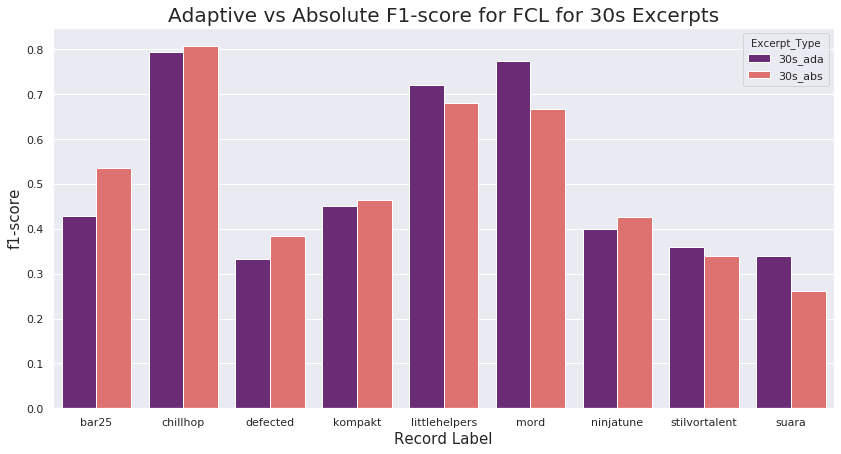

In [46]:
sns.set()
plt.figure(figsize = (14,7))
 
sns.barplot(data=df_tot,x='Record Label', y='f1-score', hue = 'Excerpt_Type', palette = 'magma')
 
plt.title("Adaptive vs Absolute F1-score for FCL for 30s Excerpts", fontsize = 20)
plt.xlabel("Record Label", fontsize = 15)
plt.ylabel("f1-score", fontsize = 15)
 
plt.savefig("Adaptive vs Absolute F1-score for FCL for 30s Excerpts")
plt.show()